# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [1]:
#!pip install yfinance --upgrade

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [3]:
# Download front-month futures data
# Adding Crude Oil to the list of futures
symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F', 'CL=F']
data = yf.download(symbols, auto_adjust=False)

[*********************100%***********************]  5 of 5 completed


In [4]:
data.tail()

Price       Adj Close                                                   Close  \
Ticker           CL=F       DX=F     ES=F         GC=F        ZN=F       CL=F   
Date                                                                            
2025-05-21  61.570000  99.434998  5861.25  3309.300049  109.500000  61.570000   
2025-05-22  61.200001  99.848999  5856.75  3292.300049  109.828125  61.200001   
2025-05-23  61.529999  99.010002  5817.00  3363.600098  110.078125  61.529999   
2025-05-26        NaN  99.010002      NaN          NaN         NaN        NaN   
2025-05-27  61.169998  99.580002  5934.25  3298.800049  110.328125  61.169998   

Price                                                    ...       Open  \
Ticker           DX=F     ES=F         GC=F        ZN=F  ...       CL=F   
Date                                                     ...              
2025-05-21  99.434998  5861.25  3309.300049  109.500000  ...  62.270000   
2025-05-22  99.848999  5856.75  3292.300049  109.828125  ...  61.330002   
2025-05-23  99.010002  5817.00  3363.600098  110.078125  ...  60.810001   
2025-05-26  99.010002      NaN          NaN         NaN  ...        NaN   
2025-05-27  99.580002  5934.25  3298.800049  110.328125  ...  61.040001   

Price                                                      Volume           \
Ticker           DX=F     ES=F         GC=F        ZN=F      CL=F     DX=F   
Date                                                                         
2025-05-21  99.845001  5953.50  3293.399902  110.140625  302702.0  20600.0   
2025-05-22  99.500000  5858.00  3327.300049  109.453125  258549.0  20765.0   
2025-05-23  99.805000  5869.25  3328.000000  109.953125  273392.0  27833.0   
2025-05-26  98.949997      NaN          NaN         NaN       NaN  10856.0   
2025-05-27  99.449997  5940.75  3300.899902  110.421875    7839.0   1803.0   

Price                                     
Ticker           ES=F    GC=F       ZN=F  
Date                                      
2025-05-21  1548946.0   979.0  2703320.0  
2025-05-22  1419522.0  1210.0  4241617.0  
2025-05-23  1537693.0    47.0  3928904.0  
2025-05-26        NaN     NaN        NaN  
2025-05-27    19372.0  9751.0    39808.0  

[5 rows x 30 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6309 entries, 2000-06-22 to 2025-05-27
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, CL=F)  6215 non-null   float64
 1   (Adj Close, DX=F)  6295 non-null   float64
 2   (Adj Close, ES=F)  6234 non-null   float64
 3   (Adj Close, GC=F)  6206 non-null   float64
 4   (Adj Close, ZN=F)  6196 non-null   float64
 5   (Close, CL=F)      6215 non-null   float64
 6   (Close, DX=F)      6295 non-null   float64
 7   (Close, ES=F)      6234 non-null   float64
 8   (Close, GC=F)      6206 non-null   float64
 9   (Close, ZN=F)      6196 non-null   float64
 10  (High, CL=F)       6215 non-null   float64
 11  (High, DX=F)       6295 non-null   float64
 12  (High, ES=F)       6234 non-null   float64
 13  (High, GC=F)       6206 non-null   float64
 14  (High, ZN=F)       6196 non-null   float64
 15  (Low, CL=F)        6215 non-null   float64
 16  (Low, 

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [6]:
data.reset_index()

Price        Date  Adj Close                                                \
Ticker                  CL=F        DX=F     ES=F         GC=F        ZN=F   
0      2000-06-22        NaN  107.400002      NaN          NaN         NaN   
1      2000-06-23        NaN  107.720001      NaN          NaN         NaN   
2      2000-06-26        NaN  107.769997      NaN          NaN         NaN   
3      2000-06-27        NaN  106.980003      NaN          NaN         NaN   
4      2000-06-28        NaN  107.250000      NaN          NaN         NaN   
...           ...        ...         ...      ...          ...         ...   
6304   2025-05-21  61.570000   99.434998  5861.25  3309.300049  109.500000   
6305   2025-05-22  61.200001   99.848999  5856.75  3292.300049  109.828125   
6306   2025-05-23  61.529999   99.010002  5817.00  3363.600098  110.078125   
6307   2025-05-26        NaN   99.010002      NaN          NaN         NaN   
6308   2025-05-27  61.169998   99.580002  5934.25  3298.800049  110.328125   

Price       Close                                    ...       Open  \
Ticker       CL=F        DX=F     ES=F         GC=F  ...       CL=F   
0             NaN  107.400002      NaN          NaN  ...        NaN   
1             NaN  107.720001      NaN          NaN  ...        NaN   
2             NaN  107.769997      NaN          NaN  ...        NaN   
3             NaN  106.980003      NaN          NaN  ...        NaN   
4             NaN  107.250000      NaN          NaN  ...        NaN   
...           ...         ...      ...          ...  ...        ...   
6304    61.570000   99.434998  5861.25  3309.300049  ...  62.270000   
6305    61.200001   99.848999  5856.75  3292.300049  ...  61.330002   
6306    61.529999   99.010002  5817.00  3363.600098  ...  60.810001   
6307          NaN   99.010002      NaN          NaN  ...        NaN   
6308    61.169998   99.580002  5934.25  3298.800049  ...  61.040001   

Price                                                   Volume           \
Ticker        DX=F     ES=F         GC=F        ZN=F      CL=F     DX=F   
0       107.099998      NaN          NaN         NaN       NaN    666.0   
1       107.430000      NaN          NaN         NaN       NaN    258.0   
2       107.680000      NaN          NaN         NaN       NaN    266.0   
3       107.849998      NaN          NaN         NaN       NaN    669.0   
4       107.059998      NaN          NaN         NaN       NaN    258.0   
...            ...      ...          ...         ...       ...      ...   
6304     99.845001  5953.50  3293.399902  110.140625  302702.0  20600.0   
6305     99.500000  5858.00  3327.300049  109.453125  258549.0  20765.0   
6306     99.805000  5869.25  3328.000000  109.953125  273392.0  27833.0   
6307     98.949997      NaN          NaN         NaN       NaN  10856.0   
6308     99.449997  5940.75  3300.899902  110.421875    7839.0   1803.0   

Price                                 
Ticker       ES=F    GC=F       ZN=F  
0             NaN     NaN        NaN  
1             NaN     NaN        NaN  
2             NaN     NaN        NaN  
3             NaN     NaN        NaN  
4             NaN     NaN        NaN  
...           ...     ...        ...  
6304    1548946.0   979.0  2703320.0  
6305    1419522.0  1210.0  4241617.0  
6306    1537693.0    47.0  3928904.0  
6307          NaN     NaN        NaN  
6308      19372.0  9751.0    39808.0  

[6309 rows x 31 columns]

In [7]:
# Resample data to monthly frequency
data = data.resample('M').last() # YOUR CODE HERE
# Convert index to datetime
data.index = pd.to_datetime(data.index) # YOUR CODE HERE

In [8]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [9]:
data.head()

Price       Adj Close                                                   Close  \
Ticker           CL=F        DX=F     ES=F        GC=F        ZN=F       CL=F   
Date                                                                            
2000-06-30        NaN  106.580002      NaN         NaN         NaN        NaN   
2000-07-31        NaN  109.370003      NaN         NaN         NaN        NaN   
2000-08-31  33.099998  112.570000      NaN  278.299988         NaN  33.099998   
2000-09-30  30.860001  113.000000  1454.00  273.600006  100.218803  30.860001   
2000-10-31  32.689999  116.620003  1440.75  264.899994  100.703102  32.689999   

Price                                                    ...       Open  \
Ticker            DX=F     ES=F        GC=F        ZN=F  ...       CL=F   
Date                                                     ...              
2000-06-30  106.580002      NaN         NaN         NaN  ...        NaN   
2000-07-31  109.370003      NaN         NaN         NaN  ...        NaN   
2000-08-31  112.570000      NaN  278.299988         NaN  ...  33.250000   
2000-09-30  113.000000  1454.00  273.600006  100.218803  ...  30.700001   
2000-10-31  116.620003  1440.75  264.899994  100.703102  ...  32.730000   

Price                                                     Volume          \
Ticker            DX=F     ES=F        GC=F        ZN=F     CL=F    DX=F   
Date                                                                       
2000-06-30  106.550003      NaN         NaN         NaN      NaN   494.0   
2000-07-31  109.500000      NaN         NaN         NaN      NaN   469.0   
2000-08-31  111.989998      NaN  274.799988         NaN  56895.0  2000.0   
2000-09-30  113.129997  1473.00  274.600006  100.265602  57628.0   511.0   
2000-10-31  117.389999  1413.25  264.500000  100.937500  63007.0   644.0   

Price                               
Ticker         ES=F  GC=F     ZN=F  
Date                                
2000-06-30      NaN   NaN      NaN  
2000-07-31      NaN   NaN      NaN  
2000-08-31      NaN   0.0      NaN  
2000-09-30  78277.0  22.0  23099.0  
2000-10-31  89660.0   0.0  38970.0  

[5 rows x 30 columns]

### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [10]:
data.head()

Price       Adj Close                                                   Close  \
Ticker           CL=F        DX=F     ES=F        GC=F        ZN=F       CL=F   
Date                                                                            
2000-06-30        NaN  106.580002      NaN         NaN         NaN        NaN   
2000-07-31        NaN  109.370003      NaN         NaN         NaN        NaN   
2000-08-31  33.099998  112.570000      NaN  278.299988         NaN  33.099998   
2000-09-30  30.860001  113.000000  1454.00  273.600006  100.218803  30.860001   
2000-10-31  32.689999  116.620003  1440.75  264.899994  100.703102  32.689999   

Price                                                    ...       Open  \
Ticker            DX=F     ES=F        GC=F        ZN=F  ...       CL=F   
Date                                                     ...              
2000-06-30  106.580002      NaN         NaN         NaN  ...        NaN   
2000-07-31  109.370003      NaN         NaN         NaN  ...        NaN   
2000-08-31  112.570000      NaN  278.299988         NaN  ...  33.250000   
2000-09-30  113.000000  1454.00  273.600006  100.218803  ...  30.700001   
2000-10-31  116.620003  1440.75  264.899994  100.703102  ...  32.730000   

Price                                                     Volume          \
Ticker            DX=F     ES=F        GC=F        ZN=F     CL=F    DX=F   
Date                                                                       
2000-06-30  106.550003      NaN         NaN         NaN      NaN   494.0   
2000-07-31  109.500000      NaN         NaN         NaN      NaN   469.0   
2000-08-31  111.989998      NaN  274.799988         NaN  56895.0  2000.0   
2000-09-30  113.129997  1473.00  274.600006  100.265602  57628.0   511.0   
2000-10-31  117.389999  1413.25  264.500000  100.937500  63007.0   644.0   

Price                               
Ticker         ES=F  GC=F     ZN=F  
Date                                
2000-06-30      NaN   NaN      NaN  
2000-07-31      NaN   NaN      NaN  
2000-08-31      NaN   0.0      NaN  
2000-09-30  78277.0  22.0  23099.0  
2000-10-31  89660.0   0.0  38970.0  

[5 rows x 30 columns]

In [11]:
# Subset adjusted close prices and fill NaNs
prices = data['Adj Close'].ffill().dropna()
# Convert index to datetime
prices.index = pd.to_datetime(prices.index) # YOUR CODE HERE

In [12]:
print(prices)

Ticker           CL=F        DX=F     ES=F         GC=F        ZN=F
Date                                                               
2000-09-30  30.860001  113.000000  1454.00   273.600006  100.218803
2000-10-31  32.689999  116.620003  1440.75   264.899994  100.703102
2000-11-30  33.799999  115.099998  1321.00   270.100006  102.703102
2000-12-31  26.799999  109.279999  1327.00   272.000000  104.890602
2001-01-31  28.700001  110.529999  1373.50   265.600006  105.484398
...               ...         ...      ...          ...         ...
2025-01-31  72.529999  108.217003  6067.25  2812.500000  108.843750
2025-02-28  69.760002  107.557999  5963.25  2836.800049  111.062500
2025-03-31  71.480003  103.883003  5653.25  3122.800049  111.218750
2025-04-30  58.209999   99.269997  5587.00  3305.000000  112.218750
2025-05-31  61.169998   99.580002  5934.25  3298.800049  110.328125

[297 rows x 5 columns]


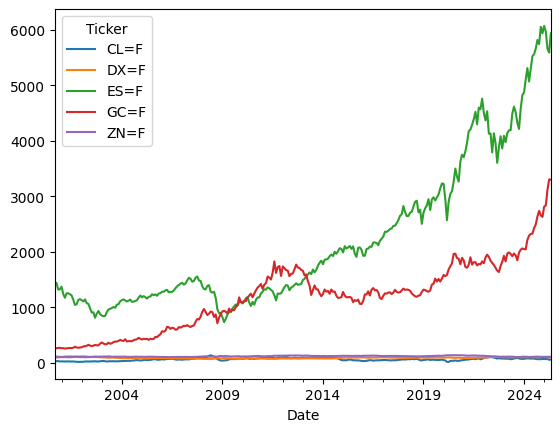

In [13]:
prices.plot()
plt.show()

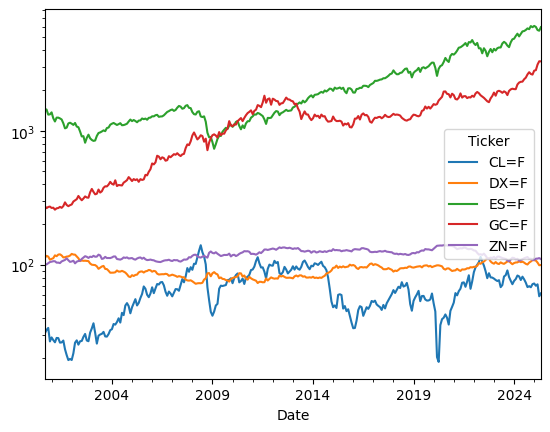

In [14]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [15]:
# Compute arithmetic returns
returns =  (prices - prices.shift(1)) / prices.shift(1)# YOUR CODE HERE

In [16]:
print(returns)

Ticker          CL=F      DX=F      ES=F      GC=F      ZN=F
Date                                                        
2000-09-30       NaN       NaN       NaN       NaN       NaN
2000-10-31  0.059300  0.032035 -0.009113 -0.031798  0.004832
2000-11-30  0.033955 -0.013034 -0.083116  0.019630  0.019860
2000-12-31 -0.207101 -0.050565  0.004542  0.007034  0.021299
2001-01-31  0.070896  0.011439  0.035041 -0.023529  0.005661
...              ...       ...       ...       ...       ...
2025-01-31  0.011294 -0.000729  0.022154  0.069717  0.000862
2025-02-28 -0.038191 -0.006090 -0.017141  0.008640  0.020385
2025-03-31  0.024656 -0.034168 -0.051985  0.100818  0.001407
2025-04-30 -0.185646 -0.044406 -0.011719  0.058345  0.008991
2025-05-31  0.050850  0.003123  0.062153 -0.001876 -0.016848

[297 rows x 5 columns]


In [17]:
prices.dropna(inplace = True)

### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [18]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window_size).std() # YOUR CODE HERE
    rolling_inverse_vol = 1 / rolling_vol # YOUR CODE HERE
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.apply(lambda col: col / rolling_inverse_vol.sum(), axis = 1) # YOUR CODE HERE
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1) # YOUR CODE HERE
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

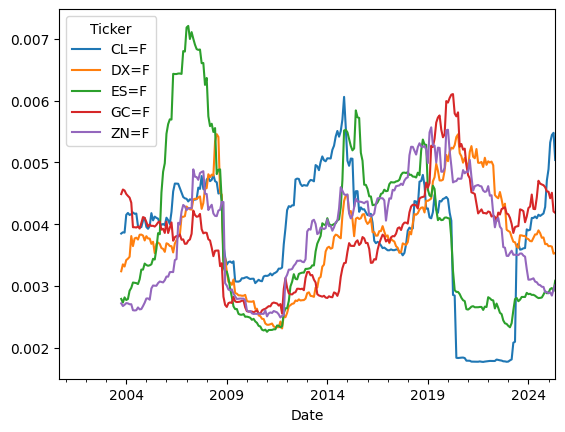

In [19]:
risk_parity_weights.plot()
plt.show()

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [20]:
# Calculate weighted returns
weighted_returns = risk_parity_weights * returns # YOUR CODE HERE
weighted_returns.dropna(inplace=True)
print(weighted_returns)
risk_parity_portfolio_returns = weighted_returns.sum(axis = 1) # YOUR CODE HERE
print(risk_parity_portfolio_returns.head())

Ticker          CL=F      DX=F      ES=F      GC=F      ZN=F
Date                                                        
2003-10-31 -0.000012 -0.000011  0.000156 -0.000010 -0.000055
2003-11-30  0.000173 -0.000094  0.000021  0.000146  0.000003
2003-12-31  0.000268 -0.000111  0.000141  0.000217 -0.000003
2004-01-31  0.000068  0.000006  0.000049 -0.000146  0.000028
2004-02-29  0.000394  0.000000  0.000036 -0.000064  0.000046
...              ...       ...       ...       ...       ...
2025-01-31  0.000055 -0.000003  0.000064  0.000316  0.000002
2025-02-28 -0.000203 -0.000022 -0.000051  0.000038  0.000059
2025-03-31  0.000134 -0.000124 -0.000154  0.000455  0.000004
2025-04-30 -0.001017 -0.000156 -0.000034  0.000245  0.000026
2025-05-31  0.000256  0.000011  0.000192 -0.000008 -0.000051

[260 rows x 5 columns]
Date
2003-10-31    0.000067
2003-11-30    0.000249
2003-12-31    0.000511
2004-01-31    0.000005
2004-02-29    0.000412
Freq: M, dtype: float64


In [21]:
print(risk_parity_portfolio_returns)

Date
2003-10-31    0.000067
2003-11-30    0.000249
2003-12-31    0.000511
2004-01-31    0.000005
2004-02-29    0.000412
                ...   
2025-01-31    0.000435
2025-02-28   -0.000179
2025-03-31    0.000314
2025-04-30   -0.000936
2025-05-31    0.000401
Freq: M, Length: 260, dtype: float64


### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [22]:
annual_mean_return = risk_parity_portfolio_returns.mean() * 12 # YOUR CODE HERE
annual_mean_return

0.0009909160082740144

In [23]:
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(12)
annual_volatility

0.001712061480969005

In [24]:
# Evaluate portfolio performance
annual_mean_return = risk_parity_portfolio_returns.mean() * 12 # YOUR CODE HERE
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(12) # YOUR CODE HERE
skewness = risk_parity_portfolio_returns.skew() # YOUR CODE HERE
kurtosis = risk_parity_portfolio_returns.kurtosis() # YOUR CODE HERE

# Compute drawdown
cumulative_returns = (risk_parity_portfolio_returns + 1).cumprod() # YOUR CODE HERE
running_max = cumulative_returns.cummax() # YOUR CODE HERE
drawdown = (running_max - cumulative_returns) / running_max # YOUR CODE HERE
max_drawdown = drawdown.max() # YOUR CODE HERE

# Compute Sharpe ratio
sharpe_ratio = annual_mean_return / annual_volatility # YOUR CODE HERE

# Compute Sortino ratio
downside_std = (risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0].std()) * np.sqrt(12) # YOUR CODE HERE
sortino_ratio = annual_mean_return / downside_std  # YOUR CODE HERE

# Compute Calmar ratio
calmar_ratio = annual_mean_return / max_drawdown # YOUR CODE HERE

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.0010
Annual Volatility: 0.0017
Skewness: -0.3989
Kurtosis: 7.5292
Maximum Drawdown: 0.0050
Sharpe Ratio: 0.5788
Sortino Ratio: 0.7416
Calmar Ratio: 0.2002


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


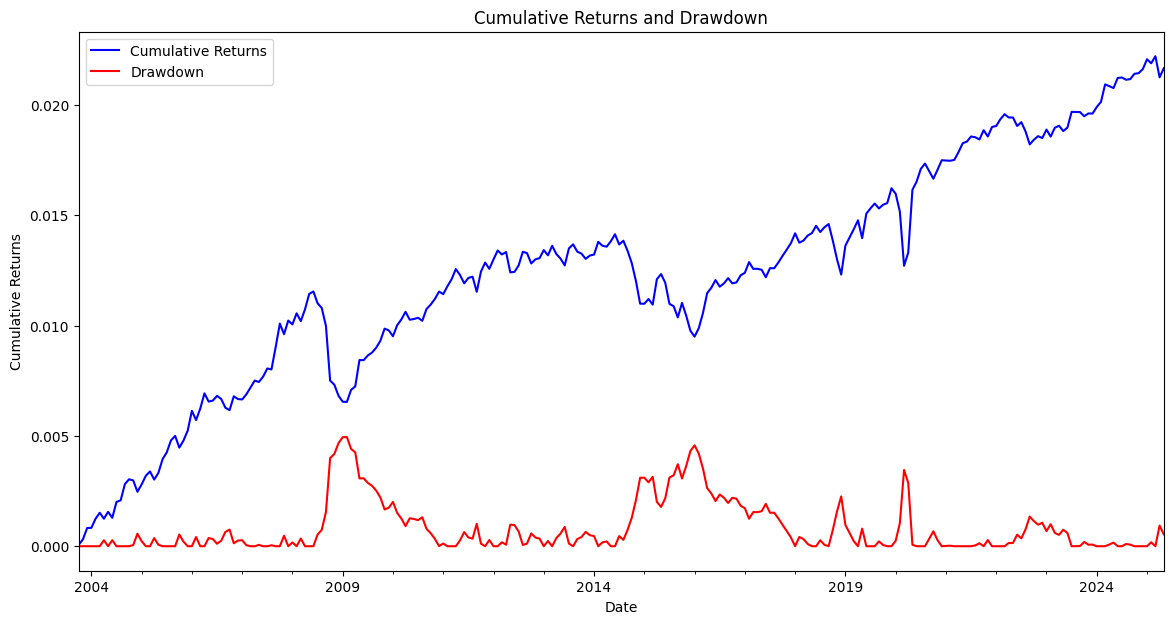

In [25]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()

# Adding Crude Oil sharply decreased the ratios due to the volatility of Crude Oil 